# PREDICTING FATALITY FROM STORM EVENTS USING A 1O-YEAR HISTORICAL STORM EVENTS DATA FROM NATIONAL OCEANING AND ATMOSPHERIC ADMINISTRATION DATABASE
#### Author: Kingsley Temidayo Fasesin

#

### Evaluating Four ML Models' (LR, RF, DT & KNN) Prediction on Strom Event Fatality 
#### Using the complete dataset with the original missing values predicted using ML model (Random Forest)

In [1]:
# import libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
DataStorm_df = pd.read_csv('RandForesr_Imputed2.csv')

## Desriptive Analysis

In [5]:
DataStorm_df

,Unnamed: 0.1,Unnamed: 0,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,...,SOURCE_Public,SOURCE_RAWS,SOURCE_River/Stream Gage,SOURCE_SNOTEL,SOURCE_Social Media,SOURCE_State Official,SOURCE_Storm Chaser,SOURCE_Trained Spotter,SOURCE_Unknown,SOURCE_Utility Company
0,1,1,201301,27,19574,421872,28.00,1525,27,1525,...,0,0,0,0,0,0,0,0,0,0
1,2,2,201301,27,19575,421873,30.00,1700,27,1700,...,0,0,0,0,0,0,0,0,0,0
2,3,3,201301,13,19577,422507,42.00,1100,13,1500,...,0,0,0,0,0,0,0,1,0,0
3,4,4,201301,19,19578,422671,60.00,1245,19,1255,...,0,0,0,0,0,0,0,0,0,0
4,5,5,201302,2,19579,422937,46.00,200,2,1800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,8112,8112,202301,12,48675,1079340,50.31,1627,12,1701,...,0,0,0,0,0,0,0,0,0,0
8114,8113,8113,202301,12,48678,1079341,54.27,1627,12,1701,...,0,0,0,0,0,0,0,0,0,0
8115,8114,8114,202301,12,48677,1079341,51.14,1627,12,1701,...,0,0,0,0,0,0,0,0,0,0
8116,8115,8115,202301,12,48680,1079342,53.47,1627,12,1701,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Drop unnamed columns in dataset
DataStorm_df = DataStorm_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [7]:
DataStorm_df

,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,YEAR,...,SOURCE_Public,SOURCE_RAWS,SOURCE_River/Stream Gage,SOURCE_SNOTEL,SOURCE_Social Media,SOURCE_State Official,SOURCE_Storm Chaser,SOURCE_Trained Spotter,SOURCE_Unknown,SOURCE_Utility Company
0,201301,27,19574,421872,28.00,1525,27,1525,70249,2013,...,0,0,0,0,0,0,0,0,0,0
1,201301,27,19575,421873,30.00,1700,27,1700,70250,2013,...,0,0,0,0,0,0,0,0,0,0
2,201301,13,19577,422507,42.00,1100,13,1500,70346,2013,...,0,0,0,0,0,0,0,1,0,0
3,201301,19,19578,422671,60.00,1245,19,1255,70376,2013,...,0,0,0,0,0,0,0,0,0,0
4,201302,2,19579,422937,46.00,200,2,1800,70418,2013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,202301,12,48675,1079340,50.31,1627,12,1701,177365,2023,...,0,0,0,0,0,0,0,0,0,0
8114,202301,12,48678,1079341,54.27,1627,12,1701,177365,2023,...,0,0,0,0,0,0,0,0,0,0
8115,202301,12,48677,1079341,51.14,1627,12,1701,177365,2023,...,0,0,0,0,0,0,0,0,0,0
8116,202301,12,48680,1079342,53.47,1627,12,1701,177365,2023,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check for missing values in dataframe
missing_values = DataStorm_df.isna().sum()
missing_values

FAT_YEARMONTH             0
FAT_DAY                   0
FATALITY_ID               0
EVENT_ID                  0
FATALITY_AGE              0
                         ..
SOURCE_State Official     0
SOURCE_Storm Chaser       0
SOURCE_Trained Spotter    0
SOURCE_Unknown            0
SOURCE_Utility Company    0
Length: 1840, dtype: int64

In [9]:
DataStorm_df.describe()

,FAT_YEARMONTH,FAT_DAY,FATALITY_ID,EVENT_ID,FATALITY_AGE,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,YEAR,...,SOURCE_Public,SOURCE_RAWS,SOURCE_River/Stream Gage,SOURCE_SNOTEL,SOURCE_Social Media,SOURCE_State Official,SOURCE_Storm Chaser,SOURCE_Trained Spotter,SOURCE_Unknown,SOURCE_Utility Company
count,8118.000000,8118.000000,8118.000000,8.118000e+03,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,...,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000,8118.000000
mean,201813.558635,16.126879,36639.291082,7.910037e+05,46.677453,1094.120473,17.063070,1524.346021,131094.038679,2018.070707,...,0.012441,0.000123,0.003942,0.000246,0.004311,0.011333,0.000739,0.025253,0.001109,0.000739
std,281.023735,9.026287,8372.187378,1.904786e+05,20.324121,672.079560,9.083108,645.638747,31231.130436,2.808394,...,0.110852,0.011099,0.062664,0.015695,0.065524,0.105857,0.027178,0.156901,0.033280,0.027178
min,201301.000000,1.000000,19574.000000,4.211080e+05,0.000000,0.000000,1.000000,0.000000,70119.000000,2013.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201604.000000,8.000000,30310.750000,6.313062e+05,34.000000,600.000000,10.000000,1100.000000,104628.750000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201809.000000,16.000000,37615.500000,7.940865e+05,46.855000,1200.000000,17.000000,1637.000000,132571.500000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202102.000000,24.000000,44178.750000,9.613020e+05,60.000000,1600.000000,25.000000,2000.000000,158241.000000,2021.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202302.000000,31.000000,48748.000000,1.084141e+06,100.000000,2358.000000,31.000000,2359.000000,178227.000000,2023.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Define Variables 

#### Define Variables

In [10]:
numeric_features = [
    'FAT_YEARMONTH', 'FAT_DAY', 'FATALITY_AGE',
    'END_DAY', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS'
]


In [11]:
categorical_features = [
    'EVENT_TYPE', 'FATALITY_TYPE', 'FATALITY_SEX', 'FATALITY_LOCATION',
    'STATE', 'MONTH_NAME', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'CZ_TIMEZONE',
    'SOURCE'
]

In [12]:
target_variables = [
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
    'DEATHS_INDIRECT']

## Machine Learning Models Being Evaluated
### Linear Regression - LR, Random Forest (regression) - RF, Decision Tree - DT, K-Nearest Neighbors - KNN


#### Split Data Into Training and Testing

In [13]:
X = DataStorm_df[numeric_features + list(DataStorm_df.columns[DataStorm_df.columns.str.startswith('EVENT_TYPE_')])]
y = DataStorm_df[target_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#### Initialize and fit models

In [14]:
linear_reg_model = LinearRegression()
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg_model = DecisionTreeRegressor(random_state=42)
knn_reg_model = KNeighborsRegressor(n_neighbors=5)

linear_reg_model.fit(X_train, y_train)
rf_reg_model.fit(X_train, y_train)
dt_reg_model.fit(X_train, y_train)
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
models = {
    "Linear Regression": linear_reg_model,
    "Random Forest Regression": rf_reg_model,
    "Decision Tree Regression": dt_reg_model,
    "K-Nearest Neighbors Regression": knn_reg_model
}

#### Predict and Evaluate Models

In [16]:
# Fit models
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [17]:
# Predict on the test set
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

Regression results for INJURIES_DIRECT:
Target Variable                          Model  Mean Squared Error  R-squared  Mean Absolute Error
INJURIES_DIRECT              Linear Regression          831.397087   0.254304             9.185501
INJURIES_DIRECT       Random Forest Regression          244.728771   0.780498             1.948575
INJURIES_DIRECT       Decision Tree Regression          264.796182   0.762499             1.696429
INJURIES_DIRECT K-Nearest Neighbors Regression          439.913645   0.605433             4.318473
--------------------------------------------------
Regression results for INJURIES_INDIRECT:
  Target Variable                          Model  Mean Squared Error  R-squared  Mean Absolute Error
INJURIES_INDIRECT              Linear Regression            7.338582   0.011604             0.764323
INJURIES_INDIRECT       Random Forest Regression            5.208683   0.298469             0.403396
INJURIES_INDIRECT       Decision Tree Regression            9.794335 

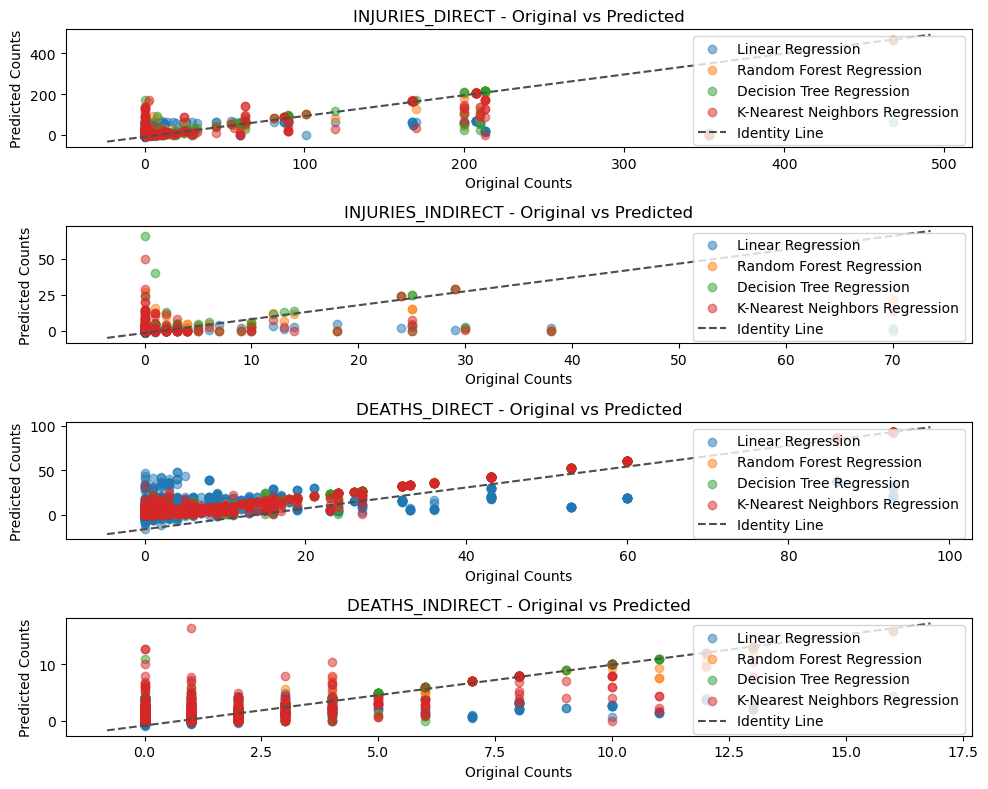

In [20]:
# Evaluate the models
results = []
for target_var in target_variables:
    for model_name, preds in predictions.items():
        mse = mean_squared_error(y_test[target_var], preds[:, target_variables.index(target_var)])
        r2 = r2_score(y_test[target_var], preds[:, target_variables.index(target_var)])
        mae = mean_absolute_error(y_test[target_var], preds[:, target_variables.index(target_var)])
        results.append([target_var, model_name, mse, r2, mae])

results_df = pd.DataFrame(results, columns=['Target Variable', 'Model', 'Mean Squared Error', 'R-squared', 'Mean Absolute Error'])

for target_var in target_variables:
    print(f"Regression results for {target_var}:")
    target_results = results_df[results_df['Target Variable'] == target_var]
    print(target_results.to_string(index=False))
    print("-" * 50)  # Separator line

# Cross-validation results
cv_results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for target_var in target_variables:
    for model_name, model in models.items():
        mse_scores = cross_val_score(model, X, y[target_var], cv=kf, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(model, X, y[target_var], cv=kf, scoring='r2')
        mae_scores = cross_val_score(model, X, y[target_var], cv=kf, scoring='neg_mean_absolute_error')
        
        mse = -np.mean(mse_scores)
        r2 = np.mean(r2_scores)
        mae = -np.mean(mae_scores)
        
        cv_results.append([target_var, model_name, mse, r2, mae])

cv_results_df = pd.DataFrame(cv_results, columns=['Target Variable', 'Model', 'Mean Squared Error', 'R-squared', 'Mean Absolute Error'])

for target_var in target_variables:
    print(f"Cross-Validation results for {target_var}:")
    target_results = cv_results_df[cv_results_df['Target Variable'] == target_var]
    print(target_results.to_string(index=False))
    print("-" * 50)  # Separator line

# Plotting original vs predicted values
fig, axes = plt.subplots(len(target_variables), 1, figsize=(10, 8))

for i, target_var in enumerate(target_variables):
    ax = axes[i]
    ax.set_title(f"{target_var} - Original vs Predicted")
    
    for model_name, preds in predictions.items():
        ax.scatter(y_test[target_var], preds[:, i], label=model_name, alpha=0.5)
    
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", label="Identity Line")
    ax.set_xlabel("Original Counts")
    ax.set_ylabel("Predicted Counts")
    ax.legend()

plt.tight_layout()
plt.show()

,Target Variable,Model,Mean Squared Error,R-squared,Mean Absolute Error
0,INJURIES_DIRECT,Linear Regression,737.591864,0.240750,9.206473
1,INJURIES_DIRECT,Random Forest Regression,197.650076,0.791164,2.004195
2,INJURIES_DIRECT,Decision Tree Regression,247.994621,0.740446,1.864934
3,INJURIES_DIRECT,K-Nearest Neighbors Regression,463.622259,0.506809,4.682554
4,INJURIES_INDIRECT,Linear Regression,26.221282,0.000124,0.807780
5,INJURIES_INDIRECT,Random Forest Regression,27.993861,-0.138635,0.545708
6,INJURIES_INDIRECT,Decision Tree Regression,35.475548,-0.716339,0.496002
7,INJURIES_INDIRECT,K-Nearest Neighbors Regression,29.103428,-0.271630,0.622506
8,DEATHS_DIRECT,Linear Regression,184.504151,0.264323,7.567601
9,DEATHS_DIRECT,Random Forest Regression,3.650869,0.985445,0.771021
